# Indian Airlines Ticket Price Analysis & Prediction

* Defining the problem statement
* Collecting the data
* Exploratory data analysis
* Data Preprocessing
* Model Building
* Evaluation

### 1) Defining the problem statment

In this project, we study the data which is in tabular format using various Python libraries like Pandas, Numpy, Matplotlib and Seaborn. 

We study different columns of the table and try to co-relate them with others and find a relation between those two.

We try to find and analyze those key factors like class of travel, duration of fight, etc. which helps us understand the pricing of tickets to plan and schedule our air travel in efficient way

### 2) Collecting the data

##### Import the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset using Pandas

In [3]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Ticket_Price_Analysis-main (1)\Ticket_Price_Analysis-main\Dataset\Indian Airlines.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


##### About the dataset:

The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [4]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [5]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


##### About the columns:

1) In airline column there are 6 unique airlines: SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India
2) In source_city & destination_city there are 6 unique cities: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai
3) In arrival & departure columns there are 6 different timings: Night, Morning, Early_Morning, Afternoon, Evening, Late_Night
4) In class column there are 2 different classes: Economy, Business

### 3) Exploratory Data Analysis






##### 1. What are number of flights operated by each airline?

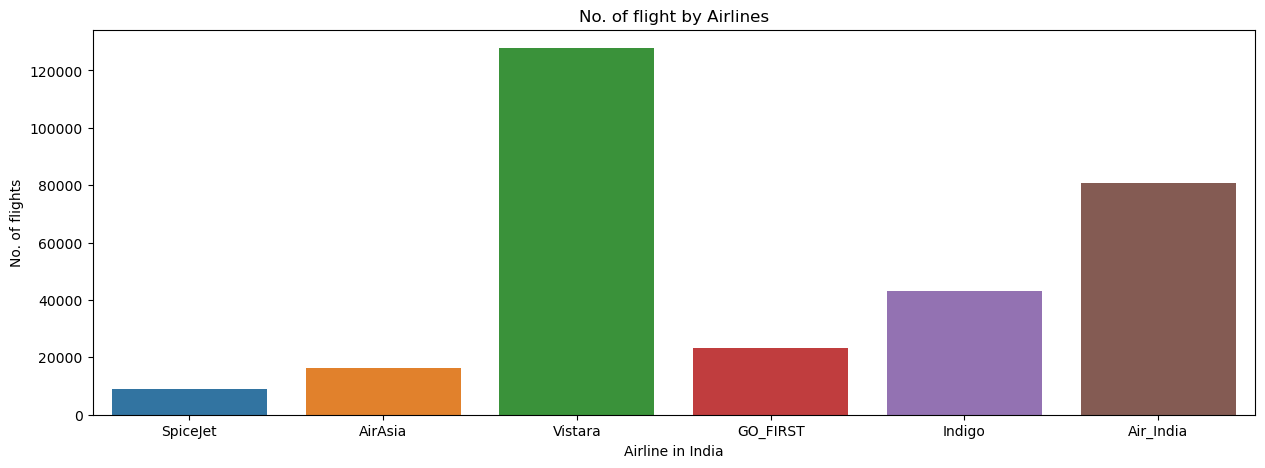

In [6]:
from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airline in India', ylabel='No. of flights', title='No. of flight by Airlines')
plt.show(NF)


From the above figure, we can see 'Vistara' has maximum no. of fights followed by 'Air India' while 'Spice Jet' has least no. of flights

##### 2. What is price range according to class of travel?

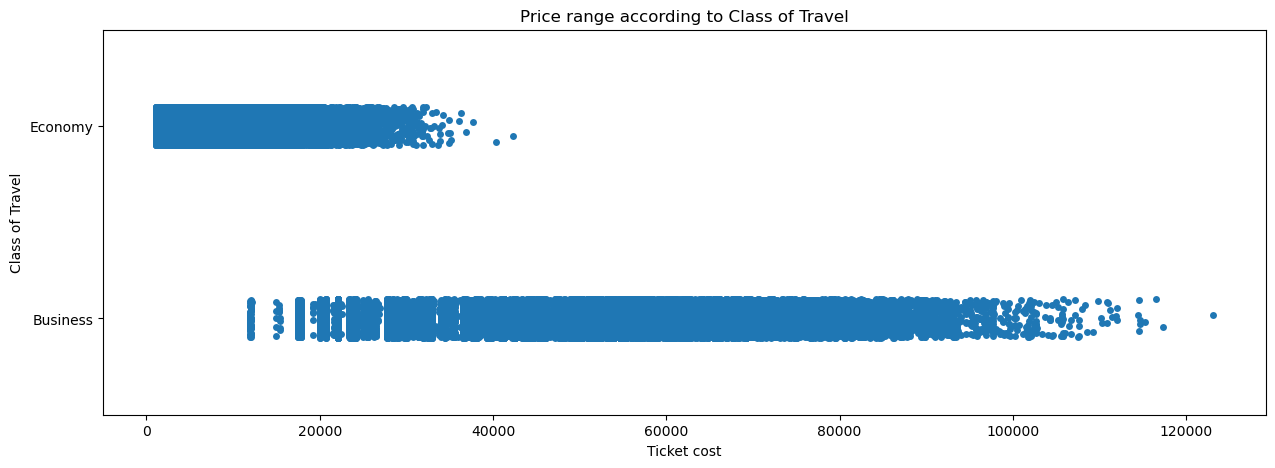

In [7]:
from turtle import title
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price range according to Class of Travel')
plt.show(CE)

From the above figure, we can see 'Economy' class tickets usually cost between 2500 - 22500 while 'Business' class tickets usually cost between 25000 - 95000

##### 3. What is availability of Tickets according to class of travel?

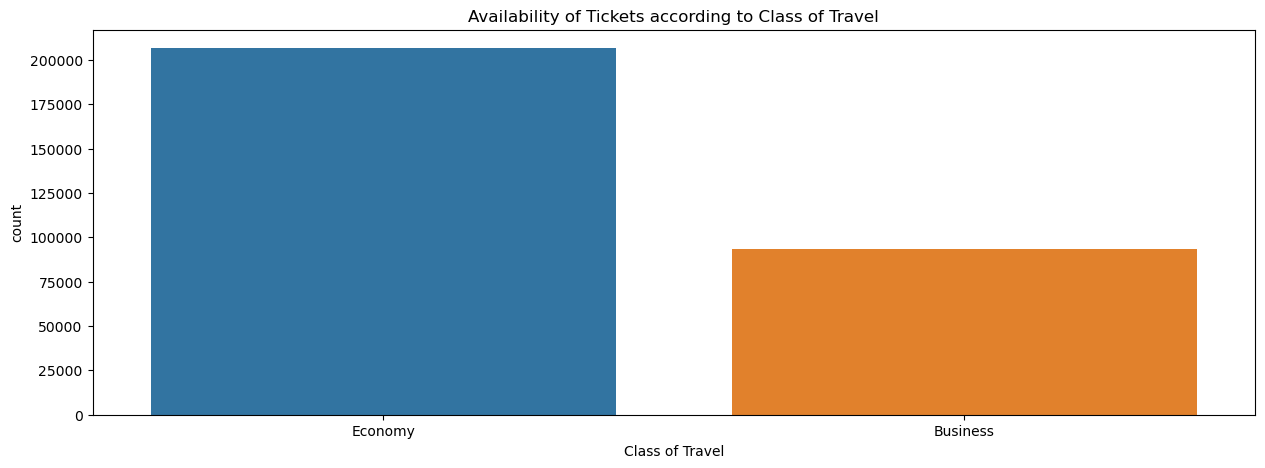

In [8]:
from turtle import title
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Class of Travel', title='Availability of Tickets according to Class of Travel')
plt.show(TA)

From the above figure, we can see that availabilty of 'Economy' tickets is almost twice than availibitly of 'Business' class tickets which is explained by the fact that only 2 airlines - 'Air India, Vistara' offer 'Business' class tickets while all airlines offer 'Economy' class tixkets. 

##### 4. What is price of ticket for different airlines based on duration of flight? 

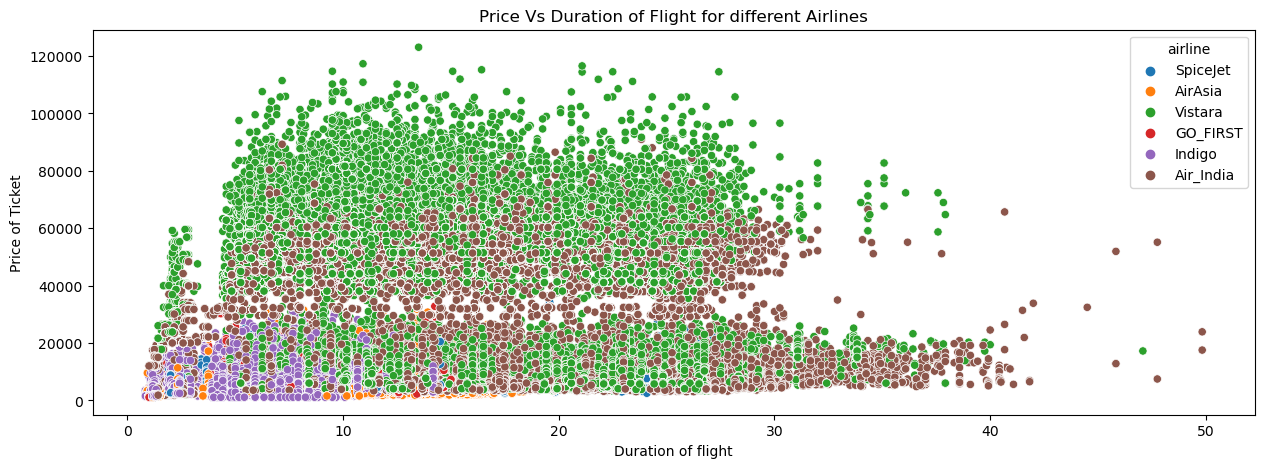

In [10]:
plt.figure(figsize=(15, 5))
PD = sns.scatterplot(x='duration', y='price', hue='airline', data=df)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Price Vs Duration of Flight for different Airlines')
plt.show()

From the above figure, we see the distribution of ticket price varying with duration of flight. More no. of green and brown points in the figure is explained by the fact that 'Vistara' and 'Air India' have maximum no. of flights. 

##### 5. How do ticket prices vary across different airlines and class of travel?

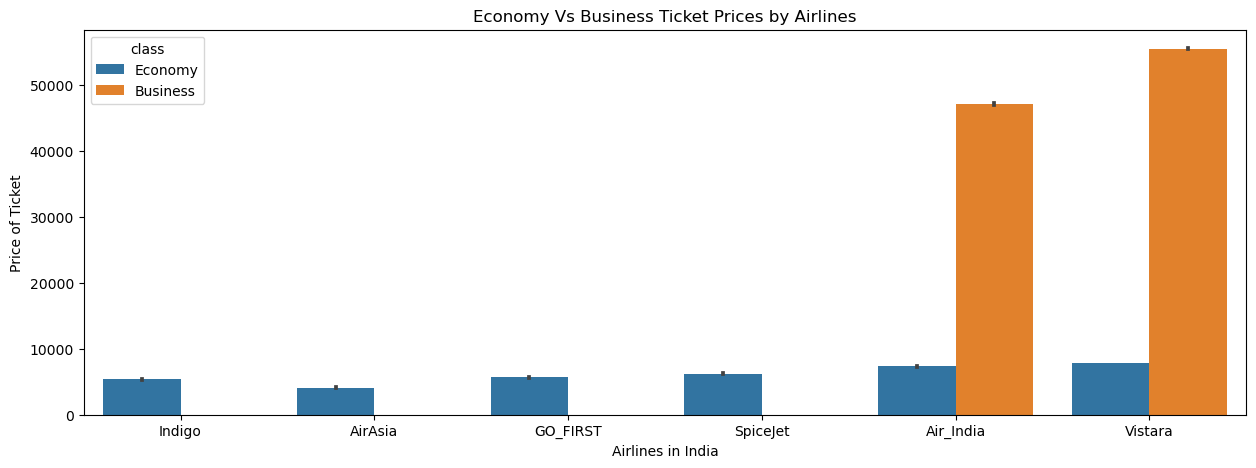

In [11]:
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

From the above figure, we can conclude that 'Air Asia' offers the cheapest 'Economy' class tickets while 'Indigo, 'Go First', 'Spice Jet' are almost similarly priced. Meanwhile 'Air India' and 'Vistara' are priced much higher than other 4 airlines which can be explained on the basis that 'Air India' and 'Vistara' are both FSCs while rest are LCCs.
'Business' class tickets for 'Vistara' cost much higher than 'Air India' which can be due to better service, quality of seats available on 'Vistara' as compared to 'Air India'

##### 6. How do airline ticket prices vary depending on when you buy them?

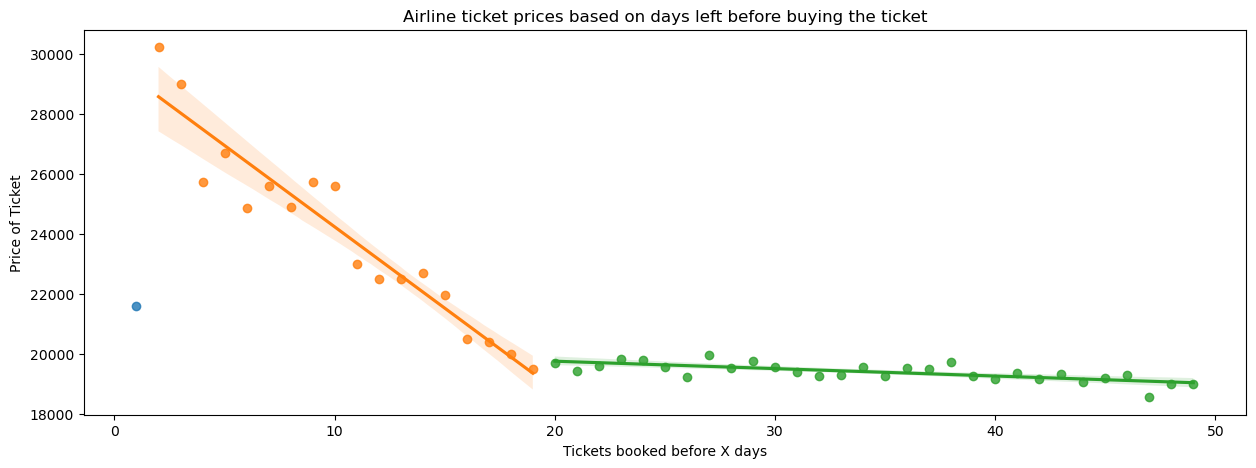

In [12]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

From the above figure, we can conclude that ticket price rise slowly till 20 days from the date of flight, then rise sharply till the last day, while dramatically reducing just 1 day before the date of flight. This can be explained by the fact that people usually buy flight tickets within 2-3 weeks of flight which generates more profits for airlines. On last day, prices show dramatic reduction as airlines hope to fill the flight completely due to increase the load factor and decrease the operational cost per passenger.

##### 7. How does price of ticket vary depending on duration of flight?

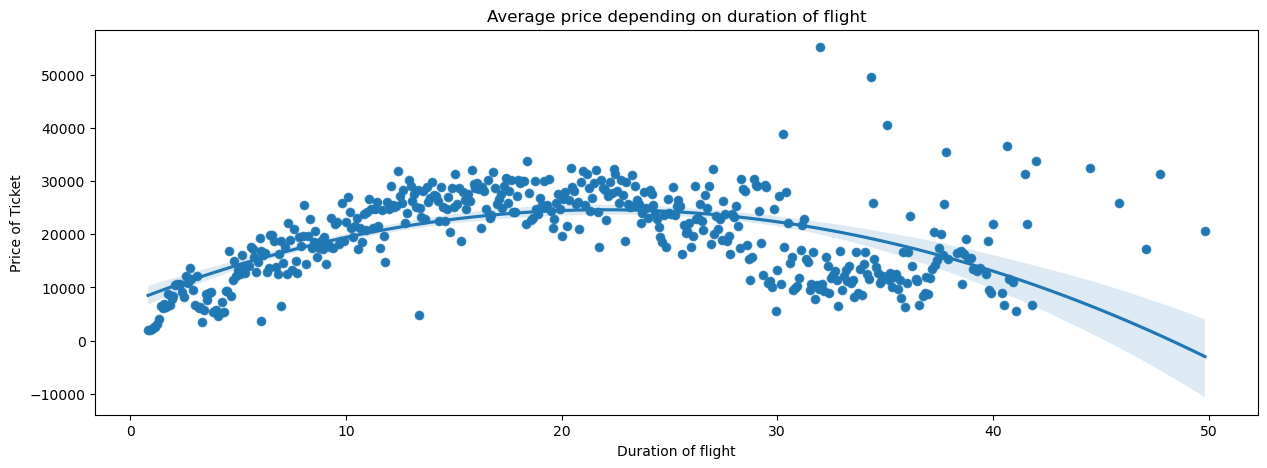

In [13]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)

From the above figure, we can see that the relationship is not linear but can be approximated by second degree curve. We can see linear growth in prices as duration of flight increases till 20 and then lowering again.
Some outliers may be affecting the curve. 

##### 8. How does ticket price vary according to departure time and arrival time?

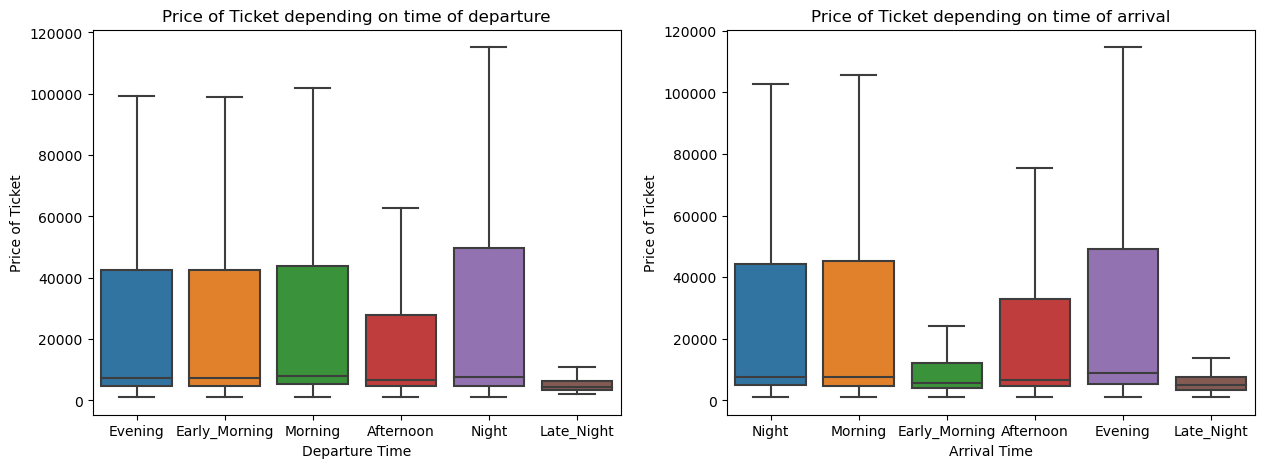

In [14]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = df, x = 'departure_time', y = 'price', showfliers = False).set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False).set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()

From the above figure, we can conclude that flights departing late at night are cheapest while those arriving early morning and late night are cheap too. Flights departung in afternoon are relatively cheap as well.

##### 9. How does ticket price vary depending on source and destination?

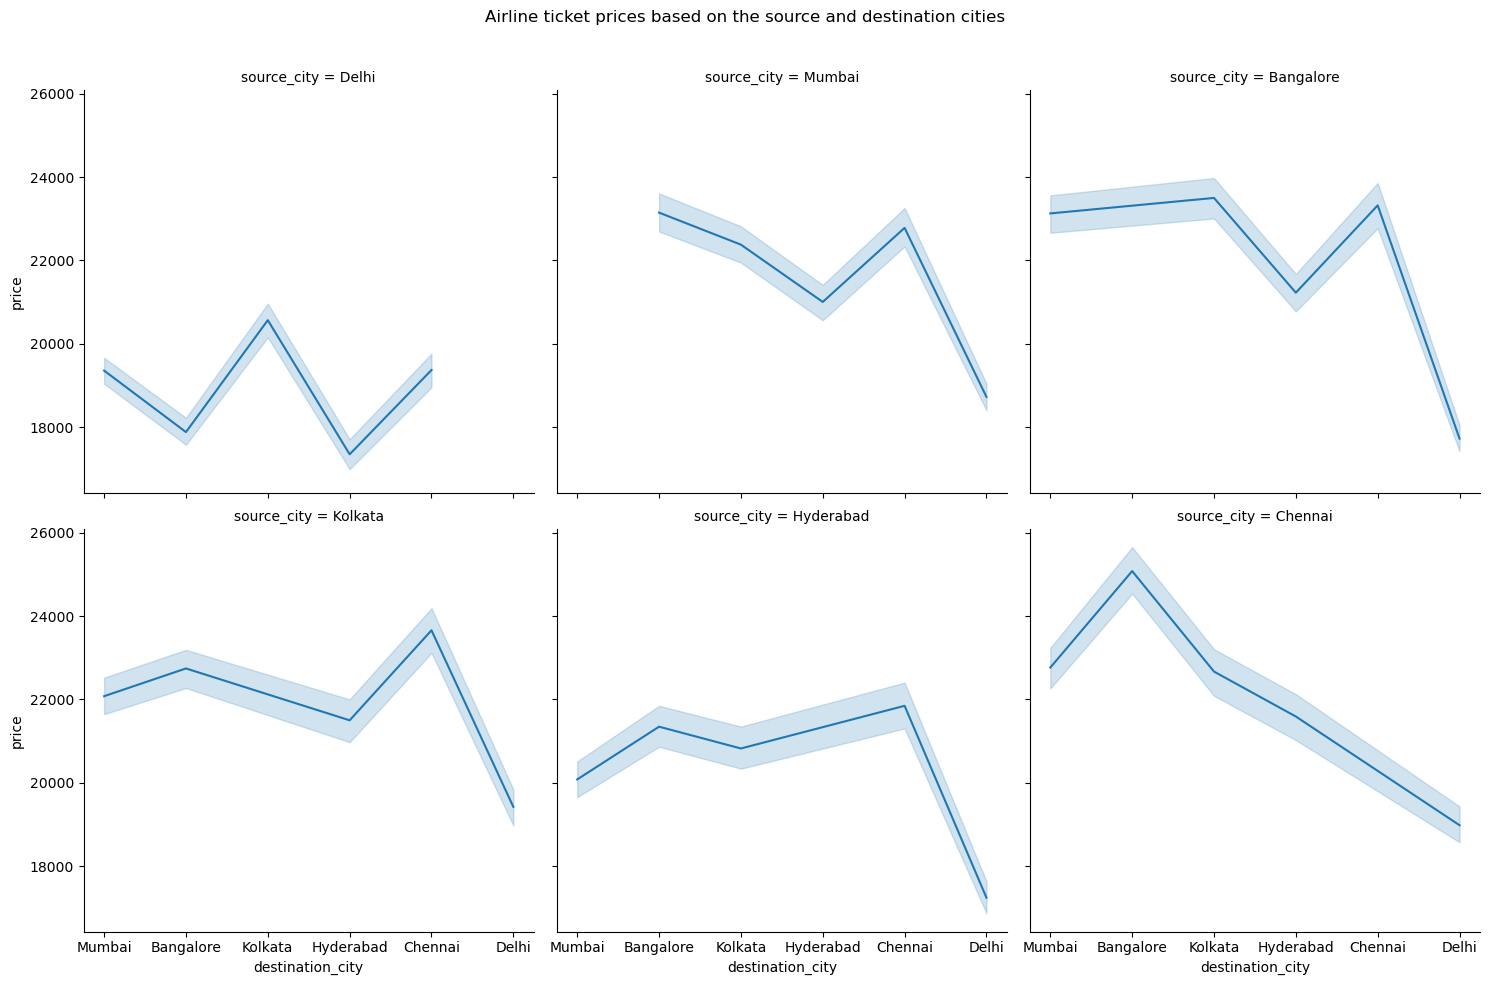

In [15]:
ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)


From the above figure, we can conclude that flight departing from Delhi are usually cheaper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of freqencies resulting in cheaper ticket prices. Chennai-Bangalore seems to be the most expensive route to fly while Hyderabad is most expensive city to fly.

##### 10. How does price of tickets vary based on no. of stops and airline?

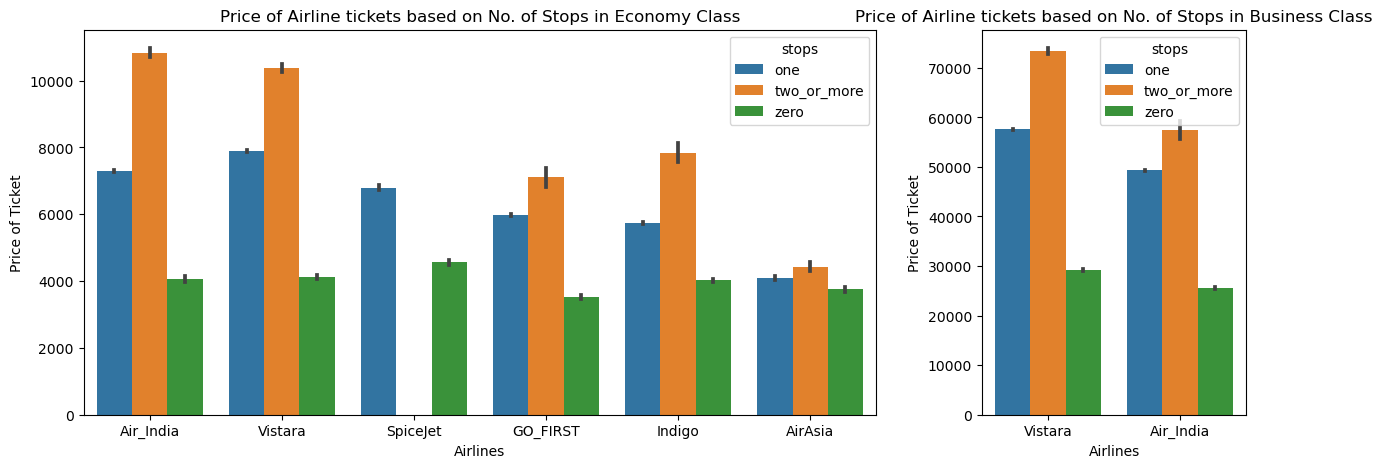

In [16]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)

From the above figure, we can conclude that Non-Stop flights are generally the cheapest while One-Stop flights are more expensive and 2+ stop flights are most expensive which can be explained on basis that as one undertakes more flights to fly to destination, it costs more.
'Air Asia' seems to be an exception in this case which shows little variation in prices between its Non-Stop, One Stop and 2+ Stop flights.

# 4) Preprocessing and Feature Engineering

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop the unnecessary column
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# 5)Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6) Model Building and Training
a) Linear Regression

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


 b) Decision Tree Regressor

In [20]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


 c) Random Forest Regressor

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


# 7) Model Evaluation

In [22]:
def evaluate(model_name, y_test, preds):
    print(f"{model_name} Performance:")
    print("R² Score:", r2_score(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("-" * 40)

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Decision Tree", y_test, dt_preds)
evaluate("Random Forest", y_test, rf_preds)


Linear Regression Performance:
R² Score: 0.904554350718816
RMSE: 7014.309680483319
----------------------------------------
Decision Tree Performance:
R² Score: 0.9756894563052412
RMSE: 3540.007674493055
----------------------------------------
Random Forest Performance:
R² Score: 0.9849372824023692
RMSE: 2786.49670973296
----------------------------------------


# 8) Visualizing Predictions vs Actuals

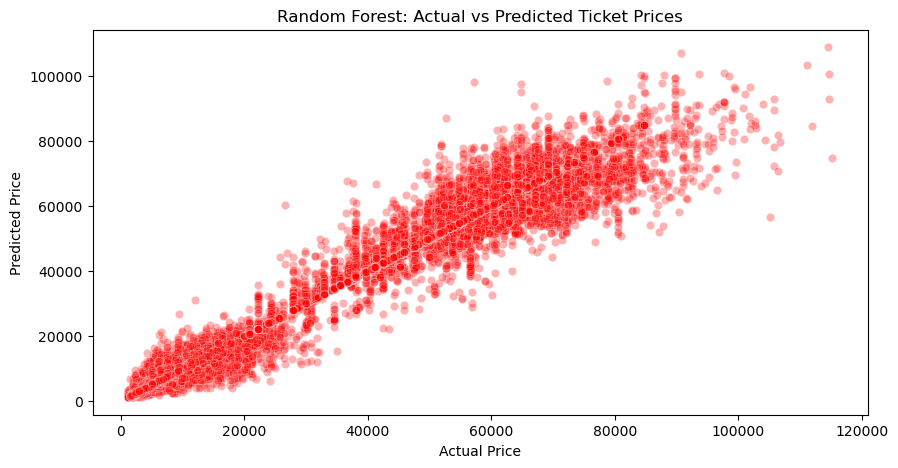

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.3, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Ticket Prices")
plt.show()


In [24]:
import joblib
joblib.dump(rf_model, 'airfare_prediction_model.pkl')


['airfare_prediction_model.pkl']